<a href="https://colab.research.google.com/github/yj9889/ESAA2/blob/main/220620deep_ch4_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 ch4. 1-3 pg. 142-181

# 04. 합성곱 신경망(CNN)

## 4-1. 합성곱 신경망
* 데이터가 가진 특징들의 패턴을 학습하는 알고리즘, 컴퓨터 비전 분야
* 이미지 분류: 이미지를 인식할 수 있는 능력
* 객체 탐지: 이미지에서 특정 객체를 인식하고 위치까지 파악해 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려준다. 일반적으로 객체의 이미지는 좌표 값으로 나타나기 때문에, 경계 박스를 찾는 문제는 회귀분석/클래스를 예측하는 문제는 분류
* 스타일 전이: 콘텐츠 이미지와 스타일 참조 이미지를 활용해 콘텐츠의 기본 형태를 유지하고 스타일을 입혀서 새로운 이미지를 생성하는 기술

### 4-1-1. 이미지 표현
* 컬러 이미지: R, G, B 세 채널로 구성된 3장의 이미지 겹쳐 표현(0~255)

In [1]:
# tensorflow 모듈 import 
import tensorflow as tf

In [2]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 4-1-2. 합성곱(Convolution)
: 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 kernel을 사용하여, 입력 이미지에 대한 특성을 추출하는 방법.
* 특성맵: 합성곱 연산을 통해 추출된 이미지
* element-wise 곱셈 연산을 수행 후 모두 더한 값으로 단일 스칼라 값이 나옴.
* 오차 역전파 시 커널의 가중치 업데이트
* 공유 가중치 때문에 합성곱 신경망이 이미지 특성 추출에 효율적.
* 커널의 gradient를 계산할 때 완전 연결층 사용할 때보다 연산량이 훨씬 적다.

### 4-1-3. 채널(Channel)
: 입력 이미지를 구성하는 2차원 배열의 개수
* 컬러이미지의 shape: (가로 픽셀, 세로 픽셀, 3)
* 입력 이미지의 채널 개수만큼 커널이 생성되고, 각 채널마다 하나씩 커널을 적용해 합성곱 연산 수행 -> element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵
* 커널 = 커널 사이즈 X 입력 채널 개수 X 출력 필터 개수
* bias: 출력 필터 개수만큼 추가됨.


### 4-1-4. 스트라이드(Stride)
: 커널이 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나가는데, 이때 이동하는 간격 (주로 1 or 2)
* 1로 설정) 우측으로 1픽셀씩 이동한 후 끝에 도달하면, 아래 방향으로 1칸 좌측 첫번째 픽셀로 이동.
* 2로 설정) 특성맵의 크기 1/2가 됨.
* 텐서플로 케라스의 *Conv2D* 레이어의 *strides* 매개변수에 지정

### 4-1-5. 패딩(Padding)
: 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 하는 것
* 일반적으로 zero-padding 사용, 입력 이미지의 가장 자리에 0으로 채워진 패딩 값으로 채운 후 추출, 패딩 후 합성곱 연산 수행하면 특성맵 크기 유지
* *padding="same"*으로 설정하면 zero-padding 옵션
* default) *padding="valid"*

### 4-1-6. 특성맵(Feature map) 사이즈
: 패딩과 스트라이드 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때 출력 데이터의 크기를 구하는 식.
165p(148)

### 4-1-7. 풀링(Pooling)
: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어.
* 장점) 이미지 축소를 통해 연산량 감소 & 과대적합 방지
* 최대 풀링) 특징의 값이 큰 값이 다른 특징들을 대표
* 풀링 레이어도 스트라이드 값을 가짐. (2로 설정 시 총 1/4 크기로 줄어듦)

## 4-2. 간단한 모델 생성

### 4-2-1. 데이터 로드 및 전처리

In [3]:
import tensorflow as tf
import numpy as np

튜플 형태로 정리

In [4]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


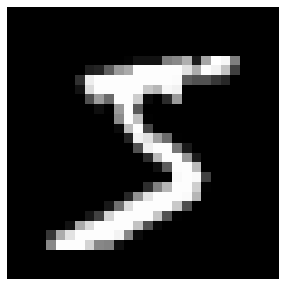

In [5]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

0-255 범위 숫자로 구성

In [6]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [7]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


CNN 모델에 주입하기 위해서 색상을 나타내는 채널 추가해 줌.

아래 코드) *tf.newaxis* 축을 텐서 배열에 직접 추가하는 방식 - (60000,28,28) -> (60000,28,28,1) 형태로 변환

[] 안에서 채널을 추가하고자 하는 위치에 tf.newaxis 작성.

In [8]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


### 4-2-2. Sequential API로 모델 생성 및 학습
합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델

* 최종 분류기로 Dense 레이어를 적용하기 위해, flatten 층을 추가해 1차원 배열로 펼쳐준다. 
* 합성곱은 Conv2D 레이어를 사용하고 (3,3) 크기의 서로 다른 32가지 종류의 커널을 적용한다.
* ReLU 활성화 함수를 적용한다.
* name 속성에 레이어의 이름을 'conv'라고 저장해 준다.
* 폴링 레이어는 (2,2) 크기로 최대 풀링을 적용하고, 레이어 이름 속성도 추가해준다. 최종 분류기는 정답 레이블이 0~9까지 10개의 값을 가지므로 노드 개수:10개로 하고, 분류 클래스가 10개인 다중분류 문제이므로 활성화 함수로 softmax 적용

In [9]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                           input_shape=(28, 28, 1), name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

옵티마이저, 손실함수, 평가지표를 설정해 주고 컴파일하면 모델 인스턴스 생성됨.

* fit()에 훈련, 검증 세트 주입 & epoch=10으로 지정 -> epoch 당 손실과 평가 결과 출력

In [10]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2275 - accuracy: 0.9343 - val_loss: 0.0994 - val_accuracy: 0.9706
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0819 - accuracy: 0.9766 - val_loss: 0.0657 - val_accuracy: 0.9790
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0604 - accuracy: 0.9821 - val_loss: 0.0561 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0498 - accuracy: 0.9852 - val_loss: 0.0613 - val_accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0567 - val_accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0601 - val_accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0545 -

evaluate() 메소드를 모델 인스턴스에 적용하면 모델의 학습된 가중치를 사용하여 손실과 평가지표 계산 - 약 98%

In [11]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.0553 - accuracy: 0.9828


[0.05533204227685928, 0.9828000068664551]

훈련 결과: history 객체에 저장.

훈련 셋의 손실) 계속 줄어듦
검증 셋의 손실) 4 epoch 이후부터는 모델이 과대적합되어 더 이상 낮아지지 않는다.

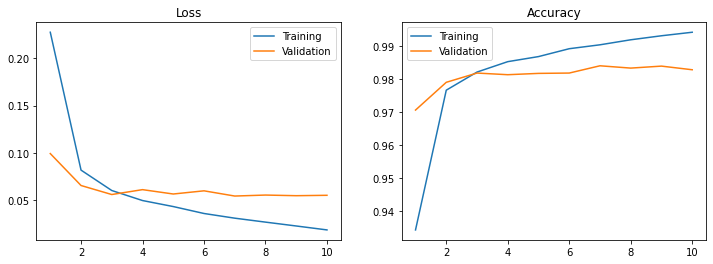

In [12]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

### 4-2-3. 모델 구조 파악

레이어의 이름, 출력 텐서의 형태, 그리고 각 레이어를 구성하는 파라미터(가중치) 개수 알 수 있음.

(28,28,1) --Conv2D--> (26,26,32)

(3,3) 크기의 합성곱 필터를 사용해 이미지 가로 세로 크기가 2씩 줄어듦(패딩은 적용되지 않았음)

서로 다른 32개의 필터 사용 -> (26,26) 크기의 특성맵이 32개 생성.

=> (28,28,1) 이미지에 서로 다른 32개 커널을 적용해서 32가지 종류의 피처(특징)를 추출하는 것.

(2,2) 크기의 풀링 레이어를 적용했기 때문에 이미지 크기 절반되어 (13,13,32) 텐서로 변환.

Flatten 층에서 3차원 텐서를 1차원 텐서로 펼치면 5408개(13X13X32)원소를 갖는 1차원 벡터가 됨.


In [13]:
# 모델 구조 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


생성된 모델 인스턴스의 input 속성으로부터 입력 레이어의 텐서 추출.

앞에 있는 축(axis=0)의 None) 배치 크기가 들어오는 위치로서 배치 크기로 어떤 값이든 가능하다.

In [14]:
# 입력 텐서 형태 
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

output 속성으로 모델의 출력 센터 선택

10개의 node를 갖는 1차원 벡터임.

In [15]:
# 출력 텐서 형태 
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [16]:
# 레이어 
model.layers

In [17]:
# 첫번째 레이어 선택
model.layers[0]

앞의 Conv2D 레이어에는 모델 입력 데이터가 그대로 들어가기 때문에 (None, 28,28,1) 형태

In [18]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [19]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

각 레이어의 가중치 행렬 추천

weights 속성을 각 레이어 인스턴스에 적용

*con/kernel:0*) 커널(합성곱 필터) 행렬의 가중치

*conv/bias:0*) 커널의 상수항(bias)

In [20]:
# 첫번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.09287667e+00, -8.48767817e-01, -9.63079929e-01,
           -2.30247453e-01, -6.24599874e-01, -1.25845563e+00,
           -6.04132973e-02,  2.61304200e-01, -3.24442722e-02,
           -6.79454580e-03,  1.80663183e-01,  1.97970405e-01,
            3.22949916e-01, -4.54330176e-01, -4.32439238e-01,
            1.16619535e-01, -2.15310082e-01, -2.63272196e-01,
            2.21025608e-02,  3.54091942e-01, -1.37409866e-01,
            3.82743061e-01, -4.29691464e-01, -3.46792400e-01,
           -1.05090749e+00,  4.34890449e-01,  2.41481647e-01,
            8.46830830e-02,  4.20266271e-01, -7.57081270e-01,
            3.65406603e-01, -4.66390789e-01]],
 
         [[-5.12189150e-01,  1.74933195e-01, -5.24773180e-01,
           -1.04947649e-02, -2.13473961e-01, -1.04496765e+00,
            5.23123085e-01,  2.10072145e-01,  5.75413525e-01,
            3.25380743e-01, -3.84476155e-01,  8.24617669e-02,
           

(3,3) 필터의 크기

(1) 입력층의 채널 개수

(32) 출력층의 채널 개수

=> layer[0] 커널의 학습(업데이트) 가능한 파라미터 개수는 3X3X1X32=288개

상수항의 가중치 shape: (,32) = 출력층의 채널 수 

=> layer[0] 커널의 총 학습(업데이트) 가능한 파라미터 = 288+32 = 320

In [21]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.09287667e+00, -8.48767817e-01, -9.63079929e-01,
          -2.30247453e-01, -6.24599874e-01, -1.25845563e+00,
          -6.04132973e-02,  2.61304200e-01, -3.24442722e-02,
          -6.79454580e-03,  1.80663183e-01,  1.97970405e-01,
           3.22949916e-01, -4.54330176e-01, -4.32439238e-01,
           1.16619535e-01, -2.15310082e-01, -2.63272196e-01,
           2.21025608e-02,  3.54091942e-01, -1.37409866e-01,
           3.82743061e-01, -4.29691464e-01, -3.46792400e-01,
          -1.05090749e+00,  4.34890449e-01,  2.41481647e-01,
           8.46830830e-02,  4.20266271e-01, -7.57081270e-01,
           3.65406603e-01, -4.66390789e-01]],

        [[-5.12189150e-01,  1.74933195e-01, -5.24773180e-01,
          -1.04947649e-02, -2.13473961e-01, -1.04496765e+00,
           5.23123085e-01,  2.10072145e-01,  5.75413525e-01,
           3.25380743e-01, -3.84476155e-01,  8.24617669e-02,
           5.91455042e-01,  

In [22]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.00348203, -0.01524692, -0.00910823, -0.00117784, -0.32130504,
       -0.00595985, -0.07788403, -0.26550493, -0.0019993 , -0.00906747,
       -0.388521  , -0.3300782 ,  0.04810726, -0.26928672, -0.35750774,
       -0.29685053, -0.20955515, -0.30203748, -0.15428075, -0.00449463,
       -0.00425804, -0.43532708, -0.1829102 , -0.01369678, -0.04521132,
        0.1836291 , -0.21784501, -0.28269958, -0.32957864, -0.05688809,
       -0.29432023, -0.14029738], dtype=float32)>

In [23]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

모델에 입력 데이터를 넣어주고, 모델의 첫 번째와 두 번째 레이어의 출력을 최종 출력으로 갖는 activator 모델 정의

첫 번째 샘플에 대하여 각 레이어의 출력 예측

In [24]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]] ) 
activations = activator.predict(x_train_in[0][tf.newaxis, ...]) 

len(activations)

2

2개의 출력 텐서 중 첫 번째는 Conv2D 레이어의 출력

1: 입력 이미지의 개수 (샘플이 1개라는 뜻)

In [25]:
# 첫 번째 레이어(conv) 출력층 
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

첫 번째 레이어에서 출력되는 특성맵 이미지를 32개 커널별로 구분하여 시각화

출력 이미지의 특징이 조금씩 차이 있음

-> 커널은 입력 이미지로부터 서로 다른 피처(특징)를 추출하는 역할

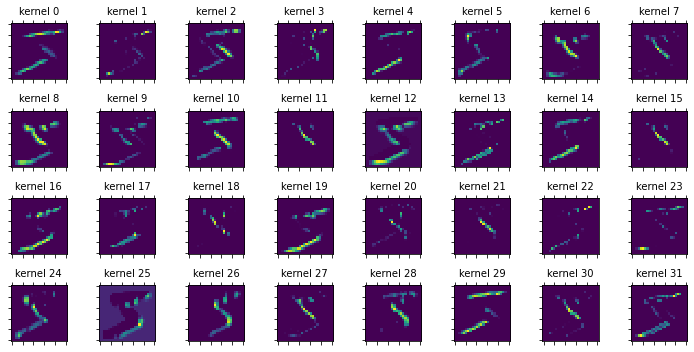

In [26]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

두 번째 레이어: 최대 풀링 레이어

In [27]:
# 두 번째 레이어(pool) 출력층 
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


앞서 Conv2D 출력 이미지에 비하여 화소 크기가 굵어짐

최대 풀링은 인근 픽셀들을 모아서 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러낼 수 있음.

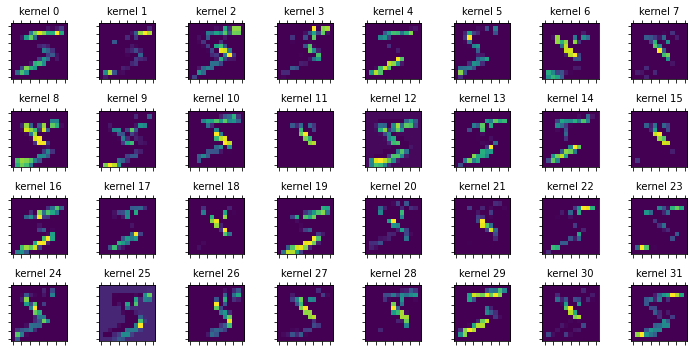

In [28]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## 4-3. 복잡한 모델 생성
: 각 레이어를 기준으로 입력이 2개 이상이거나 출력이 2개 이상인 모델 만들 수 있음 or 중간에 있는 레이어를 건너뛰고 뒤쪽에 있는 레이어로 출력텐서를 전달하는 방식으로 직접 연결

### 4-3-1. 데이터셋 준비

In [29]:
import tensorflow as tf
import numpy as np

x: 0~9 숫자를 손글씨로 쓴 이미지

y: 정답

In [30]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


y_odd: 홀수인지 짝수인지를 판단하는 정답

y_train_odd: y_train 값이 홀수면 1, 짝수면 0으로 하는 배열

In [31]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
y_train_odd = []
for y in y_train:
    if y % 2==0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

원본 y_train 배열과 홀짝으로 분류한 y_train_odd 배열 동시에 출력해 비교 - 홀짝 여부 잘 정리됨.

In [32]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


검증 데이터 셋에 대해서도 홀짝을 나타내는 y_valid_odd 배열 만듦

In [33]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y % 2==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

색상이 하나인 모노 컬러 이미지이므로, 새로운 축을 추가하고 채널 개수를 1개로 지정.

텐서플로의 *expand_dims()* 함수에 원본 배열을 입력하고, 새롭게 추가하려는 축의 인덱스를 지정하면 해당 인덱스에 새로운 축 추가됨. 여기에서는 축의 인덱스로 -1을 지정했기 때문에 새로운 축은 끝에 추가되어 (60000,28,28) -> (60000,28,28,1)

In [34]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### 4-3-2. Functional API로 다중 입력, 다중 출력 레이어 생성
: 다중 입력/다중 출력 같은 구조 만들 수 있음

아래 코드에서 inputs: Conv2D 레이어와 Flatten 레이어의 입력으로 사용됨. 따라서, 입력 레이어는 2개의 출력을 갖게 된다. 서로 다른 2개의 출력은 각각 다른 레이어의 입력으로 사용되고, 최종적으로 Concatenate 레이어에서 합쳐진 다음에 Dense 레이어를 통과한다.

In [35]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

In [50]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

ImportError: ignored

다중 분류 모델에 맞게 손실함수와 평가지표를 지정하고, 옵티마이저로는 adam 사용

10 epoch에 대한 모델 훈련을 마치고 검증 데이터에 대한 모델의 예측 성능 평가.

10개의 숫자 레이블을 맞추는 모델의 정확도는 98%로서 앞서 학습했던 Sequential 모델과 큰 차이는 없음.

In [37]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1950 - accuracy: 0.9446 - val_loss: 0.0824 - val_accuracy: 0.9745
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0732 - accuracy: 0.9785 - val_loss: 0.0653 - val_accuracy: 0.9783
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0570 - accuracy: 0.9829 - val_loss: 0.0665 - val_accuracy: 0.9794
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0467 - accuracy: 0.9860 - val_loss: 0.0550 - val_accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0611 - val_accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0552 - val_accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0566 -

### 4-3-3. 다중 출력 분류 모델
0~9까지의 숫자를 맞추는 분류 문제+홀짝을 맞추는 분류 문제를 동시에 풀어내는 모델 정의

각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심.

In [38]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2, 2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

입력은 하나이고, 출력은 10개인 텐서와 1개인 텐서로 두 개가 확인됨.

In [39]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


In [40]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

ImportError: ignored

* 컴파일 시 주의: 지정한 이름='key', 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정

* fit() 메소드를 적용할 때도 출력 값을 2개 지정하고, 레이어 이름 속성을 key로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력해야 한다.

In [42]:
# 모델 컴파일
model.compile(optimizer='adam', 
              loss={'digit_dense': 'sparse_categorical_crossentropy', 'odd_dense': 'binary_crossentropy'}, 
              loss_weights={'digit_dense': 1, 'odd_dense': 0.5}, # loss = 1.0 *sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history = model.fit({'inputs': x_train_in}, {'digit_dense': y_train, 'odd_dense': y_train_odd}, 
                    validation_data=({'inputs': x_valid_in},  {'digit_dense': y_valid, 'odd_dense': y_valid_odd}), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.3681 - digit_dense_loss: 0.2039 - odd_dense_loss: 0.3286 - digit_dense_accuracy: 0.9412 - odd_dense_accuracy: 0.8605 - val_loss: 0.2286 - val_digit_dense_loss: 0.0897 - val_odd_dense_loss: 0.2778 - val_digit_dense_accuracy: 0.9724 - val_odd_dense_accuracy: 0.8873
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2168 - digit_dense_loss: 0.0807 - odd_dense_loss: 0.2721 - digit_dense_accuracy: 0.9760 - odd_dense_accuracy: 0.8898 - val_loss: 0.1985 - val_digit_dense_loss: 0.0662 - val_odd_dense_loss: 0.2645 - val_digit_dense_accuracy: 0.9794 - val_odd_dense_accuracy: 0.8968
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1921 - digit_dense_loss: 0.0607 - odd_dense_loss: 0.2629 - digit_dense_accuracy: 0.9821 - odd_dense_accuracy: 0.8957 - val_loss: 0.1960 - val_digit_dense_loss: 0.0659 - val_odd_dense_loss: 0.2602 - val_digit_dense_accuracy: 0.9789 -

숫자 맞추는 문제: 98% 정확도

홀수 여부 판단하는 문제: 90% 정확도 - 레이어를 추가해 예측 정확도를 높여야.

In [43]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 2s 8ms/step - loss: 0.1858 - digit_dense_loss: 0.0579 - odd_dense_loss: 0.2559 - digit_dense_accuracy: 0.9837 - odd_dense_accuracy: 0.9033


[0.18583844602108002,
 0.057895079255104065,
 0.25588664412498474,
 0.9836999773979187,
 0.9032999873161316]

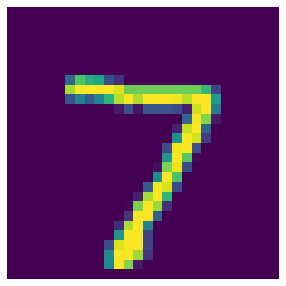

In [44]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

검증 데이터셋의 모든 이미지 데이터를 입력해서 2개의 분류 문제에 대한 예측 확률을 구함.

첫 번째 예측값: 10개의 분류 레이블에 대한 확률

두 번째 예측값: 홀수일 확률

about 숫자 7 이미지에 대한 예측 확률

In [45]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

[1.49740875e-12 9.77313092e-11 8.50289883e-09 7.17284729e-06
 2.15843294e-12 2.32200598e-13 1.29182024e-19 9.99992728e-01
 1.16269625e-08 5.60740894e-08]
[0.99969083]


argmax로 예측 확률을 실제 정답 레이블로 변환

검증 데이터셋의 첫 10개 이미지에 대한 예측 레이블은 다음과 같고 첫 번째 이미지를 7로 예측하고 있음.

In [46]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

임계값으로 0.5를 지정했는데, 홀수일 확률>0.5인 경우 홀수로 분류

첫 번째 이미지와 두 번째 이미지 각각 홀, 짝으로 잘 분류

In [47]:
odd_labels = (odd_preds > 0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

### 4-3-4. 전이학습(Transfer Learning)
앞서 훈련한 모델의 일부를 가져와 그대로 사용하고, 최종 출력층만 추가하여 모델 재구성

입력 레이어부터 'flatten_layer'라는 name 속성을 갖는 Flatten에 해당하는 부분을 따로 추출하여, base_model 객체 생성

모델 개요를 출력해서 확인해 보면 (28,28,1) 이미지를 받아서 5408개의 피처로 특징을 추출해 출력하는 모델

In [48]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [49]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

ImportError: ignored

앞서 정의한 base_model을 레이어로 추가하고, 최종 분류기의 역할을 하는 Dense 레이어를 새롭게 이어서 추가해 준다.

총 파라미터: 54,410개(모두 훈련 가능=모델 훈련 시 파라미터 값이 업데이트)

In [51]:
# Sequential API 적용
digit_model = tf.keras.Sequential([
                                   base_model,
                                   tf.keras.layers.Dense(10, activation='softmax'),
                                   ])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

98.3%의 정확도

In [52]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1285 - accuracy: 0.9641 - val_loss: 0.0644 - val_accuracy: 0.9798
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.0541 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0562 - val_accuracy: 0.9823
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0512 - val_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0525 - val_accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0543 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0537 -

모델 인스턴스는 trainable 속성을 가짐. False로 지정하면 모델의 파라미터 값이 고정되어 훈련을 통해 업데이트되지 않는다.

이런 방식으로 base_model_frozen을 구성하면 훈련 가능한 파라미터 개수가 0으로 확인.

In [53]:
# 베이스 모델의 가중치를 고정 (Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API를 적용해 구성.

총 파라미터: 54,410개이고 앞서 고정한 320개의 파라미터는 훈련 불가

훈련 가능한 파라미터: Flatten 레이어의 출력 5408 + Dense 레이어의 10개 노드 사이의 가중치 (Flatten 레이어 이전에 존재하는 Conv2D 레이어의 파라미터 320개는 포함X)

In [54]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [55]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1164 - accuracy: 0.9684 - val_loss: 0.0550 - val_accuracy: 0.9830
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0489 - accuracy: 0.9857 - val_loss: 0.0474 - val_accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0354 - accuracy: 0.9895 - val_loss: 0.0518 - val_accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0502 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0524 - val_accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0541 - val_accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0514 - val_ac

모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트되지 않도록 고정하는 방법도 가능.

아래 코드: Conv2D 레이어를 취소하고 trainable 속성을 False로 지정

In [56]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


앞서 고정한 모델에 새로운 분류기 역할을 하는 Dense 레이어를 연결하여 모델 구성

In [57]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [58]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, 
                    validation_data=(x_valid_in, y_valid), 
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1152 - accuracy: 0.9688 - val_loss: 0.0580 - val_accuracy: 0.9812
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0481 - accuracy: 0.9857 - val_loss: 0.0517 - val_accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.0479 - val_accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.0490 - val_accuracy: 0.9840
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0471 - val_accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.0502 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0541 - val_a